In [1]:
import pandas as pd

In [2]:
def prepare_dataset(df, value_name):
    # Drop unnecessary columns
    columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Reshape the dataset
    df = df.melt(id_vars=["Country Name"], 
                 var_name="Year", 
                 value_name=value_name)

    # Convert 'Year' to numeric
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    # Interpolate missing data
    df[value_name] = df.groupby('Country Name')[value_name].transform(lambda group: group.interpolate())

    # Now, keep only the data from 1990 to 2019
    df = df[(df['Year'] >= 1990) & (df['Year'] <= 2019)]

    # Drop countries that still have missing data after interpolation
    df.dropna(subset=[value_name], inplace=True)

    return df


In [3]:
df_femaleliteracy = pd.read_csv('FemaleLiteracy.csv')
df_birthrate = pd.read_csv('BirthRateData.csv')
df_femalelabour = pd.read_csv('LabourForceFemale.csv')
df_maleliteracy = pd.read_csv('MaleLiteracy.csv.csv')
df_malelabourforce = pd.read_csv('MaleLabourForce.csv.csv')
df_femalevsmalelabourratio = pd.read_csv('Female vs Male Labour Ratio.csv')
df_averageincome = pd.read_csv('AverageNationalIncome.csv')
df_internetpercent = pd.read_csv('InternetAccessPercent.csv')
df_under5mort = pd.read_csv('Under5Mortality.csv')
df_womenbusinesslaw = pd.read_csv('WomenBusinessandLawIndex.csv')

In [4]:
df_femaleliteracy = prepare_dataset(df_femaleliteracy, "Female Literacy")
df_birthrate = prepare_dataset(df_birthrate, "Birth Rate")
df_femalelabour = prepare_dataset(df_femalelabour, "Female Labour Force Participation Rate")
df_maleliteracy = prepare_dataset(df_maleliteracy, "Male Literacy")
df_malelabourforce = prepare_dataset(df_malelabourforce, "Male Labour Force Participation Rate")
df_femalevsmalelabourratio = prepare_dataset(df_femalevsmalelabourratio, "Female to Male Labour Force Participation Ratio")
df_averageincome = prepare_dataset(df_averageincome, "Average Income")
df_internetpercent = prepare_dataset(df_internetpercent, "Internet User Percentage")
df_under5mort = prepare_dataset(df_under5mort, "Under 5 Mortality")
df_womenbusinesslaw = prepare_dataset(df_womenbusinesslaw, "Women Business and Law Index")

In [5]:
# Merge all datasets
df1 = pd.merge(df_femaleliteracy, df_birthrate, on=['Country Name', 'Year'])
df1 = pd.merge(df1, df_femalelabour, on=['Country Name', 'Year'])
df1 = pd.merge(df1, df_maleliteracy, on=['Country Name', 'Year'])
df1 = pd.merge(df1, df_malelabourforce, on=['Country Name', 'Year'])
df1 = pd.merge(df1, df_femalevsmalelabourratio, on=['Country Name', 'Year'])
df1 = pd.merge(df1, df_averageincome, on=['Country Name', 'Year'])
df1 = pd.merge(df1, df_internetpercent, on=['Country Name', 'Year'])
df1 = pd.merge(df1, df_under5mort, on=['Country Name', 'Year'])
df1 = pd.merge(df1, df_womenbusinesslaw, on=['Country Name', 'Year'])

In [6]:
df1.head()

,Country Name,Year,Female Literacy,Birth Rate,Female Labour Force Participation Rate,Male Literacy,Male Labour Force Participation Rate,Female to Male Labour Force Participation Ratio,Average Income,Internet User Percentage,Under 5 Mortality,Women Business and Law Index
0,Afghanistan,1990,9.122903,51.423,15.602,35.501589,79.537,19.616028,328.277961,0.0,178.5,25.625
1,Argentina,1990,95.704626,21.989,44.871,96.000360,74.196,60.476306,3696.212873,0.0,28.8,59.375
2,Burundi,1990,27.529301,46.545,90.466,48.236252,89.753,100.794402,149.249788,0.0,170.3,47.500
3,Benin,1990,15.484173,45.365,56.977,37.639742,88.564,64.334267,312.639293,0.0,172.7,40.000
4,Burkina Faso,1990,7.923252,46.842,79.375,19.307527,88.827,89.359091,313.133680,0.0,199.1,61.875


In [7]:
df1.to_csv('checkpoint2.csv', index=False)

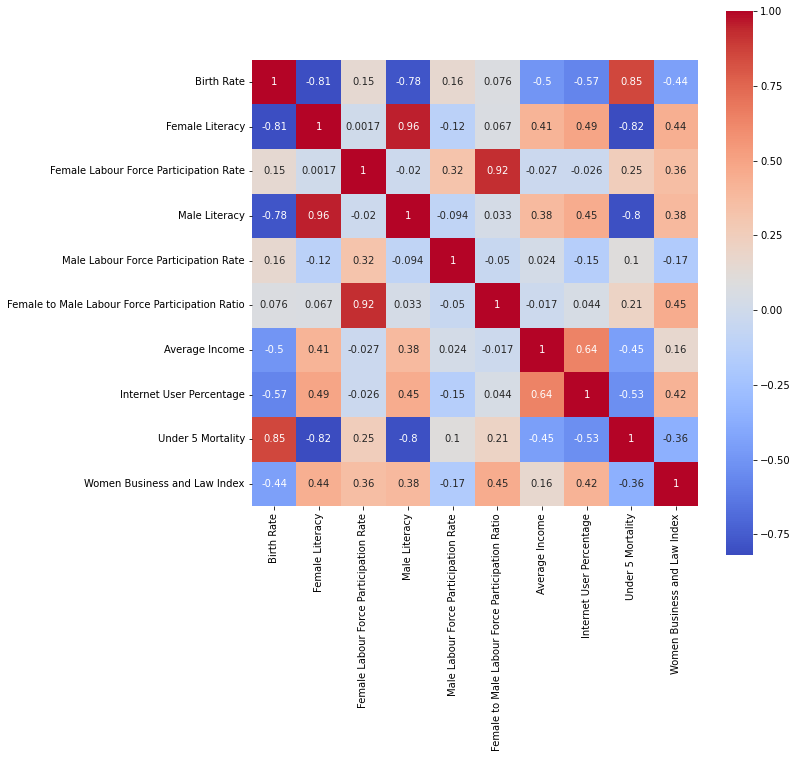

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of all factors (excluding 'Country Name' and 'Year')
factors = ['Birth Rate','Female Literacy', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality', 'Women Business and Law Index']

# Select only the factors from the DataFrame
df_factors = df1[factors]

# Calculate the correlation matrix
correlation_matrix = df_factors.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()


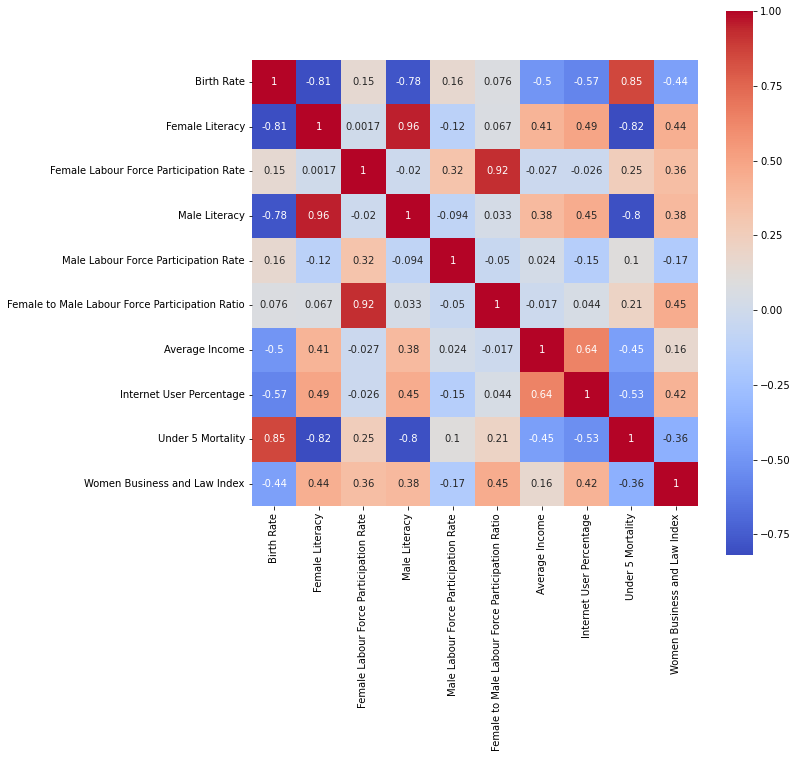

In [11]:
# List of all factors with 'Birth Rate' first
factors = ['Birth Rate', 'Female Literacy', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality', 'Women Business and Law Index']

# Select only the factors from the DataFrame
df_factors = df1[factors]

# Calculate the correlation matrix
correlation_matrix = df_factors.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()


In [12]:
df1.to_csv('checkpoint3.csv', index=False)

In [13]:
df_unemployment = pd.read_csv('UnemploymentWorld.csv')

In [14]:
def prepare_dataset_with_bfill(df, value_name):
    # Drop unnecessary columns
    columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Reshape the dataset
    df = df.melt(id_vars=["Country Name"], 
                 var_name="Year", 
                 value_name=value_name)

    # Convert 'Year' to numeric
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    # Interpolate missing data
    df[value_name] = df.groupby('Country Name')[value_name].transform(lambda group: group.interpolate())

    # Back-fill the data for 1990
    df[value_name] = df.groupby('Country Name')[value_name].transform(lambda group: group.bfill())

    # Now, keep only the data from 1990 to 2019
    df = df[(df['Year'] >= 1990) & (df['Year'] <= 2019)]

    # Drop countries that still have missing data after interpolation and back-fill
    df.dropna(subset=[value_name], inplace=True)

    return df


In [15]:
df_unemployment = prepare_dataset_with_bfill(df_unemployment,'Unemployment')

In [16]:
df1 = pd.merge(df1, df_unemployment, on=['Country Name', 'Year'])

In [17]:
# List of all factors (excluding 'Country Name' and 'Year')
factors = ['Female Literacy', 'Birth Rate', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality','Women Business and Law Index','Unemployment']

# Select only the factors from the DataFrame
df_factors = df1[factors]

# Calculate the correlation matrix
correlation_matrix = df_factors.corr()

# Print the correlation matrix
print(correlation_matrix)


                                                 Female Literacy  Birth Rate  \
Female Literacy                                         1.000000   -0.810057   
Birth Rate                                             -0.810057    1.000000   
Female Labour Force Participation Rate                  0.001710    0.154356   
Male Literacy                                           0.955899   -0.778505   
Male Labour Force Participation Rate                   -0.118653    0.160442   
Female to Male Labour Force Participation Ratio         0.067033    0.075780   
Average Income                                          0.412244   -0.501060   
Internet User Percentage                                0.489363   -0.574035   
Under 5 Mortality                                      -0.818691    0.853658   
Women Business and Law Index                            0.440361   -0.443697   
Unemployment                                            0.185335   -0.200803   

                                       

In [18]:
df1.head()

,Country Name,Year,Female Literacy,Birth Rate,Female Labour Force Participation Rate,Male Literacy,Male Labour Force Participation Rate,Female to Male Labour Force Participation Ratio,Average Income,Internet User Percentage,Under 5 Mortality,Women Business and Law Index,Unemployment
0,Afghanistan,1990,9.122903,51.423,15.602,35.501589,79.537,19.616028,328.277961,0.0,178.5,25.625,8.121
1,Argentina,1990,95.704626,21.989,44.871,96.000360,74.196,60.476306,3696.212873,0.0,28.8,59.375,5.440
2,Burundi,1990,27.529301,46.545,90.466,48.236252,89.753,100.794402,149.249788,0.0,170.3,47.500,2.616
3,Benin,1990,15.484173,45.365,56.977,37.639742,88.564,64.334267,312.639293,0.0,172.7,40.000,1.484
4,Burkina Faso,1990,7.923252,46.842,79.375,19.307527,88.827,89.359091,313.133680,0.0,199.1,61.875,2.553


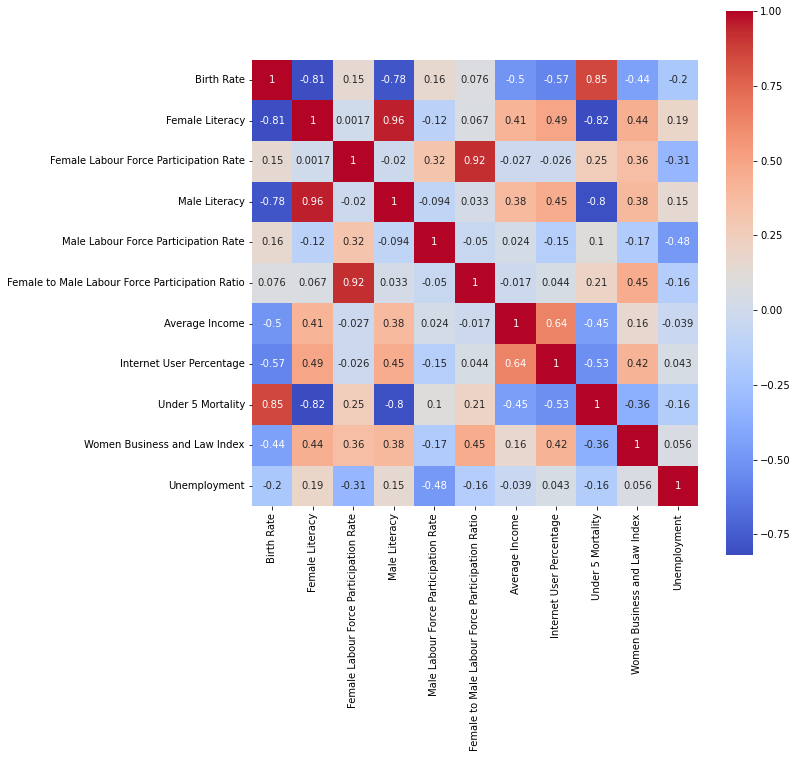

In [19]:
# List of all factors with 'Birth Rate' first
factors = ['Birth Rate', 'Female Literacy', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality', 'Women Business and Law Index','Unemployment']

# Select only the factors from the DataFrame
df_factors = df1[factors]

# Calculate the correlation matrix
correlation_matrix = df_factors.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

plt.show()


In [23]:
df1.describe()

,Year,Female Literacy,Birth Rate,Female Labour Force Participation Rate,Male Literacy,Male Labour Force Participation Rate,Female to Male Labour Force Participation Ratio,Average Income,Internet User Percentage,Under 5 Mortality,Women Business and Law Index,Unemployment
count,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000
mean,2006.069444,73.698530,25.576628,48.686427,82.735908,73.289076,66.652356,4775.937174,19.428854,53.212695,62.668344,7.990016
std,8.214603,25.513838,11.353373,16.051174,18.338665,8.719440,20.445556,7520.871123,24.669265,49.897912,17.413624,6.017586
min,1990.000000,3.687170,5.900000,5.924000,7.198440,43.567000,8.532399,-115.775162,0.000000,2.300000,22.500000,0.100000
25%,2000.000000,56.617294,16.394500,39.765750,73.479363,67.457000,54.712633,667.936175,0.472907,15.400000,50.000000,3.610000
50%,2007.000000,82.590281,23.733000,49.809000,88.938561,74.295500,70.910481,1953.691235,6.859803,32.800000,64.257812,6.293151
75%,2013.000000,95.120892,34.502750,59.106750,97.066131,79.375157,81.623329,5247.981798,32.308952,79.000000,75.000000,10.608630
max,2019.000000,99.999947,53.521000,90.466000,99.999977,95.853000,108.393461,64743.930720,99.701504,340.600000,100.000000,38.800000


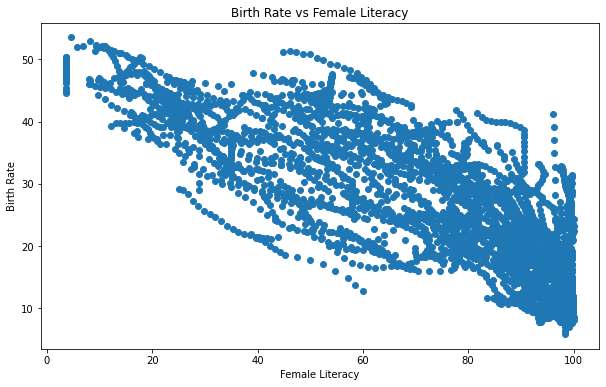

In [24]:
#Now lets do some Exploratory Data Analysis using scatter plots
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Female Literacy'], df1['Birth Rate'])
plt.title('Birth Rate vs Female Literacy')
plt.xlabel('Female Literacy')
plt.ylabel('Birth Rate')
plt.show()


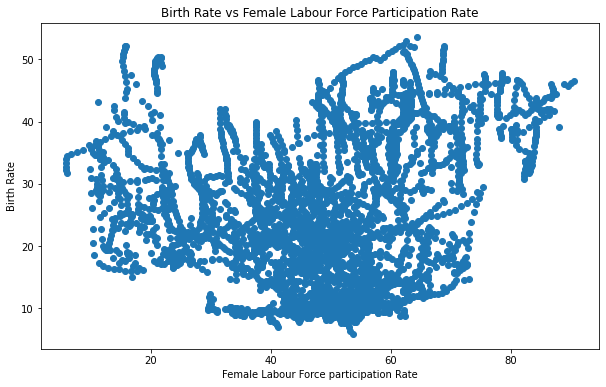

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Female Labour Force Participation Rate'], df1['Birth Rate'])
plt.title('Birth Rate vs Female Labour Force Participation Rate')
plt.xlabel('Female Labour Force participation Rate')
plt.ylabel('Birth Rate')
plt.show()


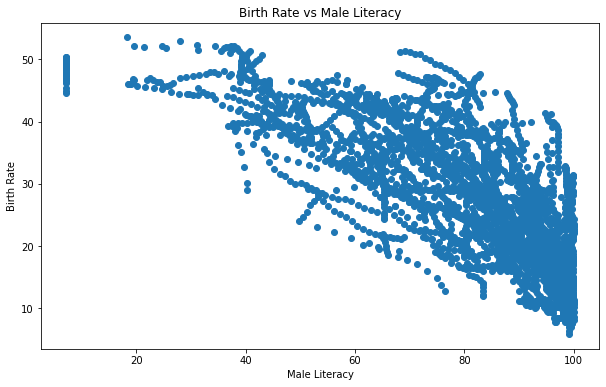

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Male Literacy'], df1['Birth Rate'])
plt.title('Birth Rate vs Male Literacy')
plt.xlabel('Male Literacy')
plt.ylabel('Birth Rate')
plt.show()

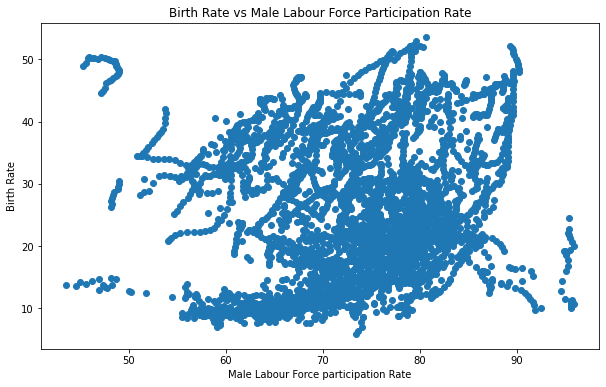

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Male Labour Force Participation Rate'], df1['Birth Rate'])
plt.title('Birth Rate vs Male Labour Force Participation Rate')
plt.xlabel('Male Labour Force participation Rate')
plt.ylabel('Birth Rate')
plt.show()

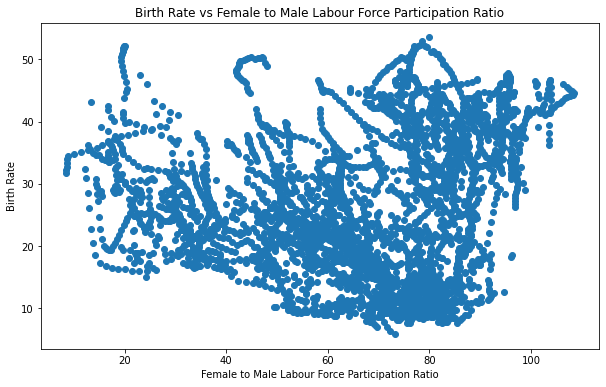

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Female to Male Labour Force Participation Ratio'], df1['Birth Rate'])
plt.title('Birth Rate vs Female to Male Labour Force Participation Ratio')
plt.xlabel('Female to Male Labour Force Participation Ratio')
plt.ylabel('Birth Rate')
plt.show()

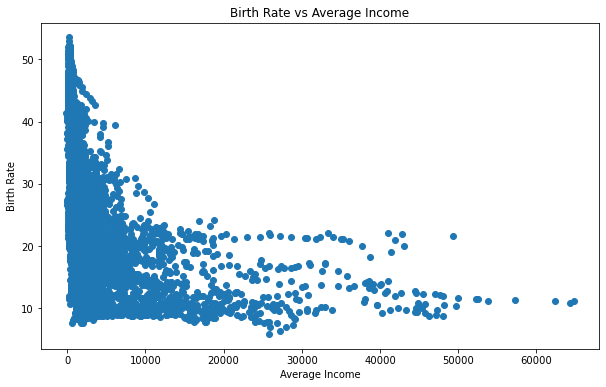

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Average Income'], df1['Birth Rate'])
plt.title('Birth Rate vs Average Income')
plt.xlabel('Average Income')
plt.ylabel('Birth Rate')
plt.show()

C:\Users\subhan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='log_Birth Rate', ylabel='log_Average Income'>

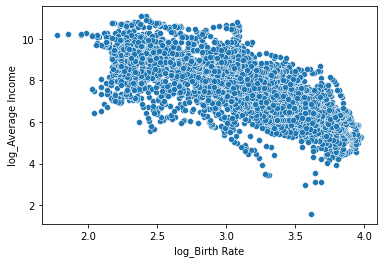

In [30]:
import numpy as np
# Apply log transformation
df1['log_Birth Rate'] = np.log(df1['Birth Rate'])
df1['log_Average Income'] = np.log(df1['Average Income'])

# Plot
sns.scatterplot(x='log_Birth Rate', y='log_Average Income', data=df1)


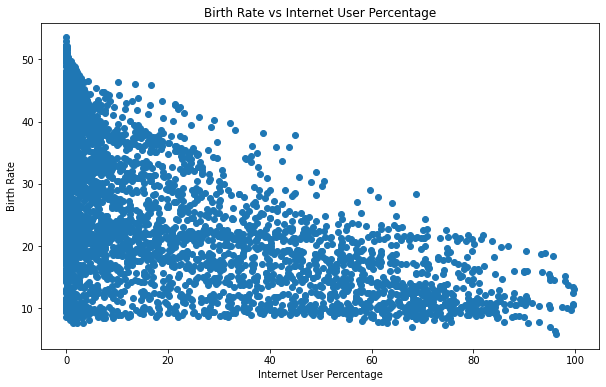

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Internet User Percentage'], df1['Birth Rate'])
plt.title('Birth Rate vs Internet User Percentage')
plt.xlabel('Internet User Percentage')
plt.ylabel('Birth Rate')
plt.show()

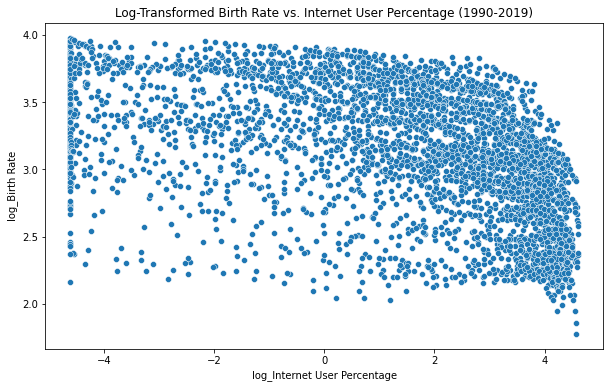

In [32]:

import seaborn as sns
import matplotlib.pyplot as plt

# Apply logarithmic transformation to 'Birth Rate' and 'Internet User Percentage'
# Adding a small constant to avoid taking the log of zero
df1['log_Birth Rate'] = np.log(df1['Birth Rate'])
df1['log_Internet User Percentage'] = np.log(df1['Internet User Percentage'] + 0.01)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_Internet User Percentage', y='log_Birth Rate', data=df1)
plt.title('Log-Transformed Birth Rate vs. Internet User Percentage (1990-2019)')
plt.show()


In [33]:
correlation = df1['log_Birth Rate'].corr(df1['log_Internet User Percentage'])
print(f"The correlation between log-transformed Birth Rate and Internet User Percentage is {correlation}")


The correlation between log-transformed Birth Rate and Internet User Percentage is -0.5076647463111066


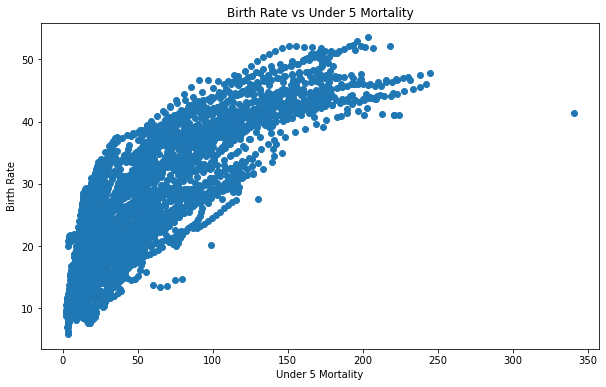

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df1['Under 5 Mortality'], df1['Birth Rate'])
plt.title('Birth Rate vs Under 5 Mortality')
plt.xlabel('Under 5 Mortality')
plt.ylabel('Birth Rate')
plt.show()

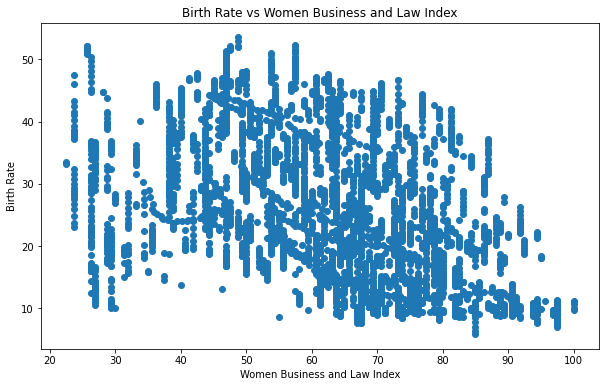

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(df1['Women Business and Law Index'], df1['Birth Rate'])
plt.title('Birth Rate vs Women Business and Law Index')
plt.xlabel('Women Business and Law Index')
plt.ylabel('Birth Rate')
plt.show()

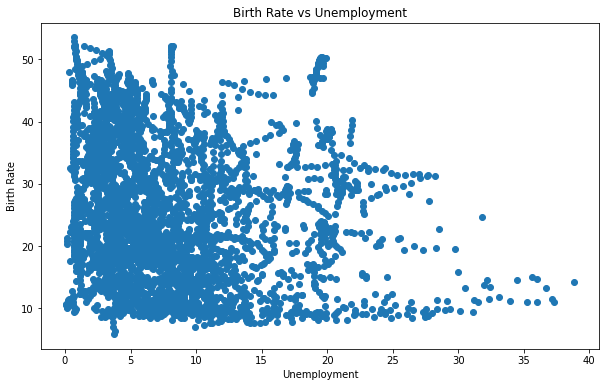

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df1['Unemployment'], df1['Birth Rate'])
plt.title('Birth Rate vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Birth Rate')
plt.show()

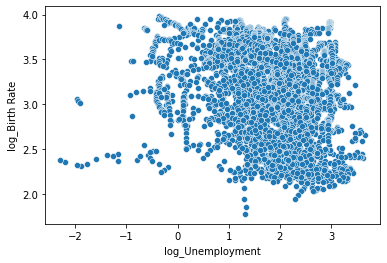

The correlation between log-transformed Birth Rate and Unemployment is -0.22648747403108982


In [37]:
# Create a small constant
small_constant = 1e-3

# Apply log transformation
df1['log_Birth Rate'] = np.log(df1['Birth Rate'])
df1['log_Unemployment'] = np.log(df1['Unemployment'] + small_constant)

sns.scatterplot(data=df1, x='log_Unemployment', y='log_Birth Rate')
plt.show()

correlation = df1['log_Birth Rate'].corr(df1['log_Unemployment'])
print(f"The correlation between log-transformed Birth Rate and Unemployment is {correlation}")


In [38]:
import statsmodels.api as sm

# Define predictor variables and outcome variable
X = df1[['Female Literacy', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality', 'Women Business and Law Index', 'Unemployment']]
y = df1['Birth Rate']

# Add a constant to the predictor variable set to represent the Y-intercept
X = sm.add_constant(X)

# Conduct the multiple regression
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Birth Rate   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1673.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:36:38   Log-Likelihood:                -12455.
No. Observations:                4104   AIC:                         2.493e+04
Df Residuals:                    4093   BIC:                         2.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [39]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Define the independent variables and the target variable
X = df1[['Female Literacy', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality', 'Women Business and Law Index', 'Unemployment']]
y = df1['Birth Rate']
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'The Mean Squared Error of the model is: {mse}')


The Mean Squared Error of the model is: 2.1043163085768275


In [40]:
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
print(feature_importances.sort_values(ascending=False))


Under 5 Mortality                                  0.775962
Male Literacy                                      0.041379
Female to Male Labour Force Participation Ratio    0.038880
Male Labour Force Participation Rate               0.029963
Female Literacy                                    0.028206
Women Business and Law Index                       0.027840
Female Labour Force Participation Rate             0.016562
Unemployment                                       0.016307
Average Income                                     0.013263
Internet User Percentage                           0.011638
dtype: float64


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact


features = ['Birth Rate','Female Literacy', 
            'Under 5 Mortality', 'Women Business and Law Index']

df1 = df1.sort_values('Year')

def plot_for_country(country):
    plt.figure(figsize=(15,8))
    plt.title(f"Evolution of features for {country}")
    country_data = df1[df1['Country Name'] == country]
    for feature in features:
        sns.lineplot(data=country_data, x='Year', y=feature, label=feature)
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

interact(plot_for_country, country=df1['Country Name'].unique())



interactive(children=(Dropdown(description='country', options=('Afghanistan', 'South Asia', 'Rwanda', 'Qatar',…

<function __main__.plot_for_country(country)>

In [43]:
#China implemented a one Child Policy from 1980 to 2016, which would have affected the birth rate despite other factors, 
#I am removing it from the Analysis to get a clearer picture for countries without such a policy.
df1 = df1[df1['Country Name'] != 'China']




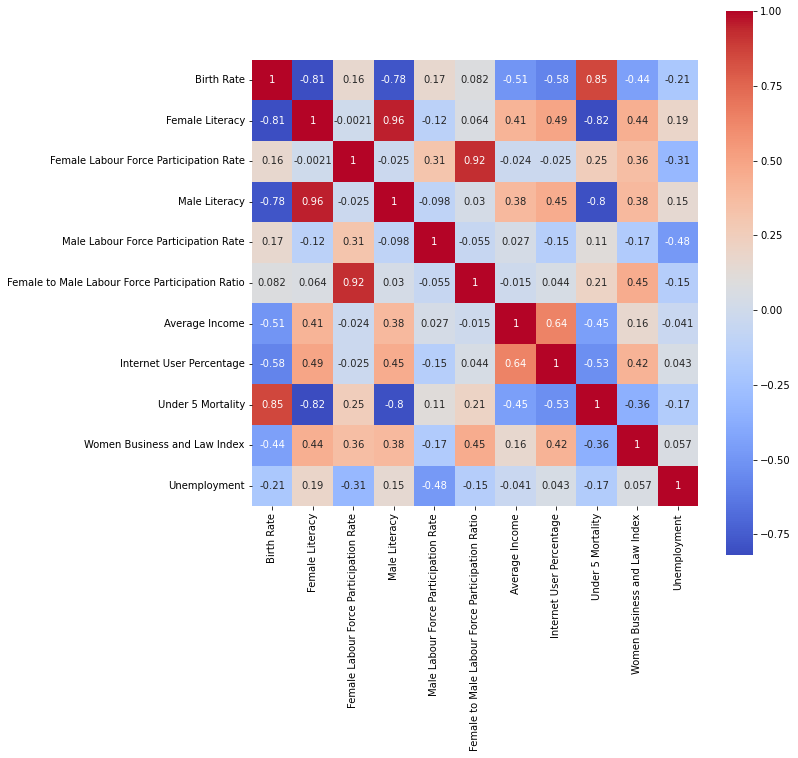

In [44]:
factors = ['Birth Rate', 'Female Literacy', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality', 'Women Business and Law Index','Unemployment']

df_factors = df1[factors]

correlation_matrix = df_factors.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

plt.show()


In [45]:
df1.describe()

,Year,Female Literacy,Birth Rate,Female Labour Force Participation Rate,Male Literacy,Male Labour Force Participation Rate,Female to Male Labour Force Participation Ratio,Average Income,Internet User Percentage,Under 5 Mortality,Women Business and Law Index,Unemployment,log_Birth Rate,log_Average Income,log_Internet User Percentage,log_Unemployment
count,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4071.000000,4074.000000,4074.000000
mean,2006.081001,73.603609,25.660042,48.548660,82.645855,73.237561,66.525379,4792.010801,19.424729,53.396073,62.631077,8.020144,3.135546,7.570567,1.076054,1.775663
std,8.210155,25.573954,11.350911,16.025697,18.373551,8.725150,20.466528,7543.381871,24.687079,50.017428,17.464323,6.029013,0.485794,1.404485,2.876365,0.856944
min,1990.000000,3.687170,5.900000,5.924000,7.198440,43.567000,8.532399,-115.775162,0.000000,2.300000,22.500000,0.100000,1.774952,1.581405,-4.605170,-2.292635
25%,2000.000000,56.474090,16.530250,39.695000,73.221537,67.388250,54.475264,668.260880,0.474127,15.400000,50.000000,3.626250,2.805192,6.506177,-0.725410,1.288475
50%,2007.000000,82.450958,23.892500,49.726000,88.856901,74.215905,70.702163,1957.186580,6.839640,33.000000,63.995849,6.347986,3.173565,7.579669,1.924195,1.848295
75%,2013.000000,95.156053,34.560250,58.650533,97.046287,79.335750,81.474014,5264.278243,32.250000,79.600000,75.000000,10.640000,3.542704,8.571717,3.473828,2.364714
max,2019.000000,99.999947,53.521000,90.466000,99.999977,95.853000,108.393461,64743.930720,99.701504,340.600000,100.000000,38.800000,3.980074,11.078195,4.602281,3.658446


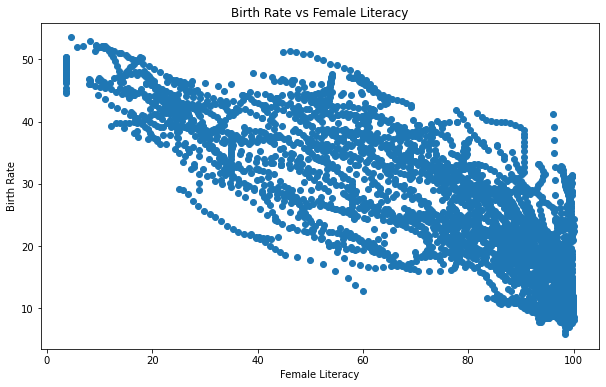

In [46]:
#Now lets do some Exploratory Data Analysis using scatter plots
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Female Literacy'], df1['Birth Rate'])
plt.title('Birth Rate vs Female Literacy')
plt.xlabel('Female Literacy')
plt.ylabel('Birth Rate')
plt.show()

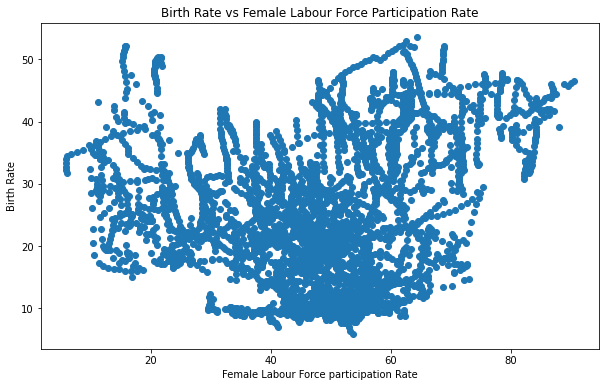

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Female Labour Force Participation Rate'], df1['Birth Rate'])
plt.title('Birth Rate vs Female Labour Force Participation Rate')
plt.xlabel('Female Labour Force participation Rate')
plt.ylabel('Birth Rate')
plt.show()


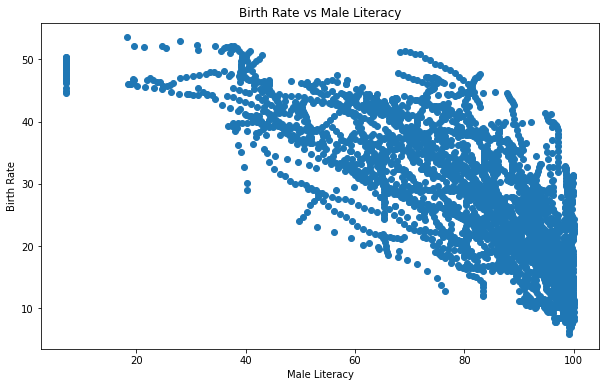

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Male Literacy'], df1['Birth Rate'])
plt.title('Birth Rate vs Male Literacy')
plt.xlabel('Male Literacy')
plt.ylabel('Birth Rate')
plt.show()

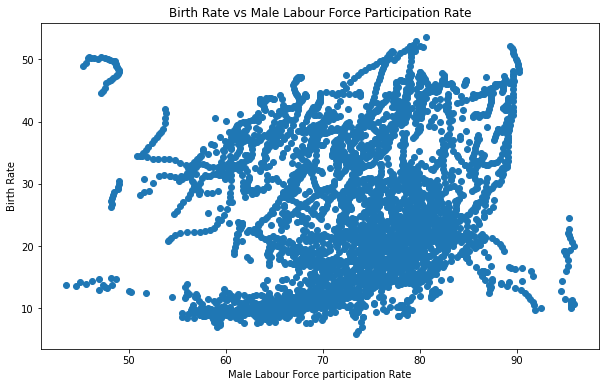

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Male Labour Force Participation Rate'], df1['Birth Rate'])
plt.title('Birth Rate vs Male Labour Force Participation Rate')
plt.xlabel('Male Labour Force participation Rate')
plt.ylabel('Birth Rate')
plt.show()

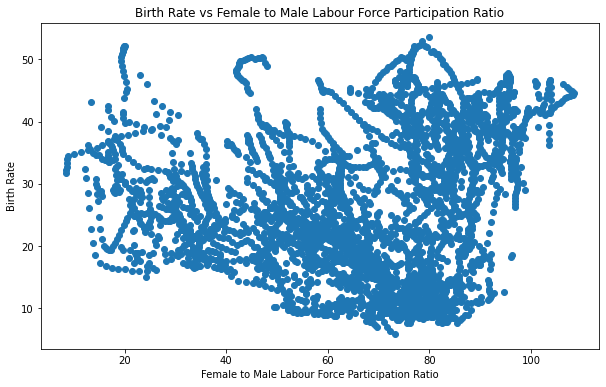

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Female to Male Labour Force Participation Ratio'], df1['Birth Rate'])
plt.title('Birth Rate vs Female to Male Labour Force Participation Ratio')
plt.xlabel('Female to Male Labour Force Participation Ratio')
plt.ylabel('Birth Rate')
plt.show()

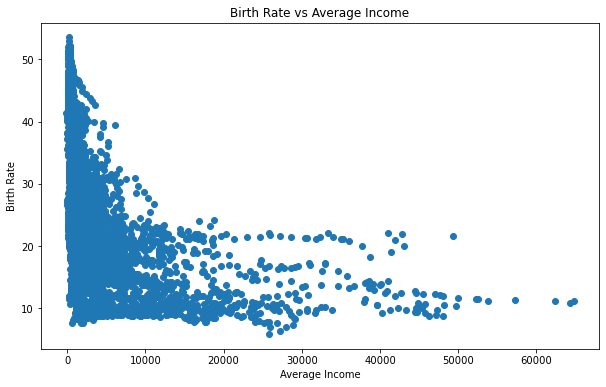

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Average Income'], df1['Birth Rate'])
plt.title('Birth Rate vs Average Income')
plt.xlabel('Average Income')
plt.ylabel('Birth Rate')
plt.show()

C:\Users\subhan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='log_Birth Rate', ylabel='log_Average Income'>

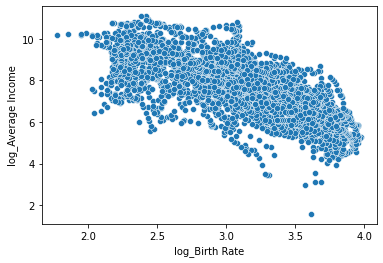

In [52]:
import numpy as np
# Applying log transformation
df1['log_Birth Rate'] = np.log(df1['Birth Rate'])
df1['log_Average Income'] = np.log(df1['Average Income'])


sns.scatterplot(x='log_Birth Rate', y='log_Average Income', data=df1)


In [57]:
correlation = df1['log_Birth Rate'].corr(df1['log_Average Income'])
print(f"The correlation between log-transformed Birth Rate and log transformed Average Income is {correlation}")

The correlation between log-transformed Birth Rate and log transformed Average Income is -0.7297374090955537


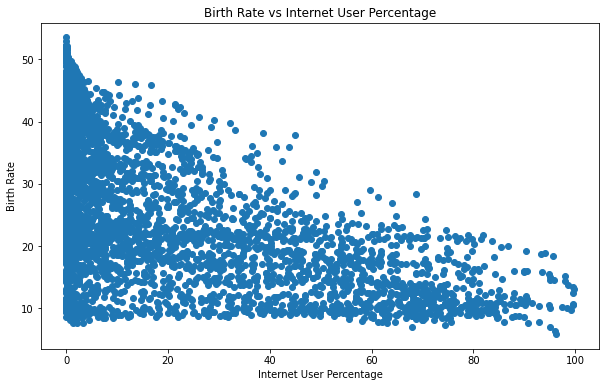

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df1['Internet User Percentage'], df1['Birth Rate'])
plt.title('Birth Rate vs Internet User Percentage')
plt.xlabel('Internet User Percentage')
plt.ylabel('Birth Rate')
plt.show()

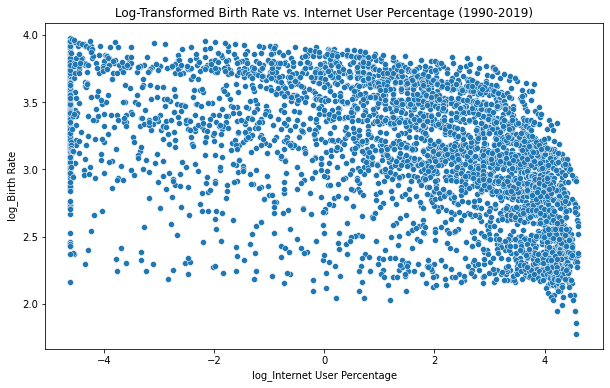

In [54]:

import seaborn as sns
import matplotlib.pyplot as plt

# Applying logarithmic transformation to 'Birth Rate' and 'Internet User Percentage'
# Adding a small constant to avoid taking the log of zero
df1['log_Birth Rate'] = np.log(df1['Birth Rate'])
df1['log_Internet User Percentage'] = np.log(df1['Internet User Percentage'] + 0.01)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_Internet User Percentage', y='log_Birth Rate', data=df1)
plt.title('Log-Transformed Birth Rate vs. Internet User Percentage (1990-2019)')
plt.show()


In [55]:
# Calculate and print the correlation coefficient of the transformed variables
correlation = df1['log_Birth Rate'].corr(df1['log_Internet User Percentage'])
print(f"The correlation between log-transformed Birth Rate and Internet User Percentage is {correlation}")

The correlation between log-transformed Birth Rate and Internet User Percentage is -0.5102927153498584


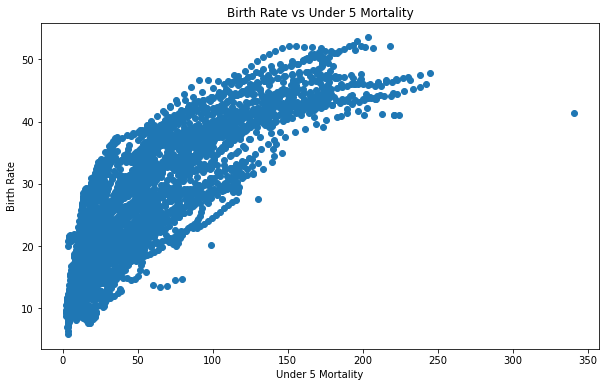

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(df1['Under 5 Mortality'], df1['Birth Rate'])
plt.title('Birth Rate vs Under 5 Mortality')
plt.xlabel('Under 5 Mortality')
plt.ylabel('Birth Rate')
plt.show()

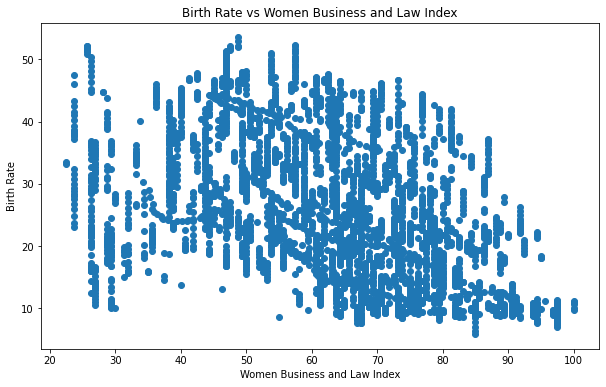

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(df1['Women Business and Law Index'], df1['Birth Rate'])
plt.title('Birth Rate vs Women Business and Law Index')
plt.xlabel('Women Business and Law Index')
plt.ylabel('Birth Rate')
plt.show()

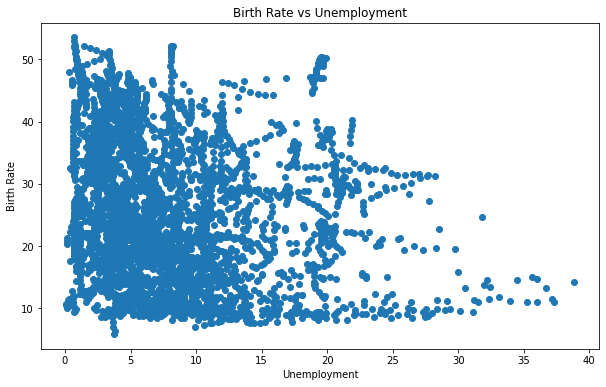

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(df1['Unemployment'], df1['Birth Rate'])
plt.title('Birth Rate vs Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Birth Rate')
plt.show()

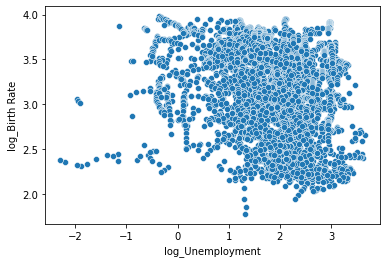

The correlation between log-transformed Birth Rate and Unemployment is -0.23089789321240786


In [61]:
small_constant = 1e-3

# Apply log transformation
df1['log_Birth Rate'] = np.log(df1['Birth Rate'])
df1['log_Unemployment'] = np.log(df1['Unemployment'] + small_constant)

sns.scatterplot(data=df1, x='log_Unemployment', y='log_Birth Rate')
plt.show()

correlation = df1['log_Birth Rate'].corr(df1['log_Unemployment'])
print(f"The correlation between log-transformed Birth Rate and Unemployment is {correlation}")


In [62]:
# Define predictor variables and outcome variable
X = df1[['Female Literacy', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality', 'Women Business and Law Index', 'Unemployment']]
y = df1['Birth Rate']

# Add a constant to the predictor variable set to represent the Y-intercept
X = sm.add_constant(X)

# Conduct the multiple regression
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Birth Rate   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1696.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:48:39   Log-Likelihood:                -12329.
No. Observations:                4074   AIC:                         2.468e+04
Df Residuals:                    4063   BIC:                         2.475e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [63]:
# Define the independent variables and the target variable
X = df1[['Female Literacy', 'Female Labour Force Participation Rate', 'Male Literacy', 'Male Labour Force Participation Rate', 'Female to Male Labour Force Participation Ratio', 'Average Income', 'Internet User Percentage', 'Under 5 Mortality', 'Women Business and Law Index', 'Unemployment']]
y = df1['Birth Rate']
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the Mean Squared Error of the model
mse = mean_squared_error(y_test, y_pred)

print(f'The Mean Squared Error of the model is: {mse}')


The Mean Squared Error of the model is: 2.614910192771637


In [64]:
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
print(feature_importances.sort_values(ascending=False))


Under 5 Mortality                                  0.781334
Female to Male Labour Force Participation Ratio    0.035676
Female Literacy                                    0.033158
Women Business and Law Index                       0.031499
Male Labour Force Participation Rate               0.030829
Male Literacy                                      0.028351
Female Labour Force Participation Rate             0.018394
Unemployment                                       0.014956
Average Income                                     0.014583
Internet User Percentage                           0.011220
dtype: float64


C:\Users\subhan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


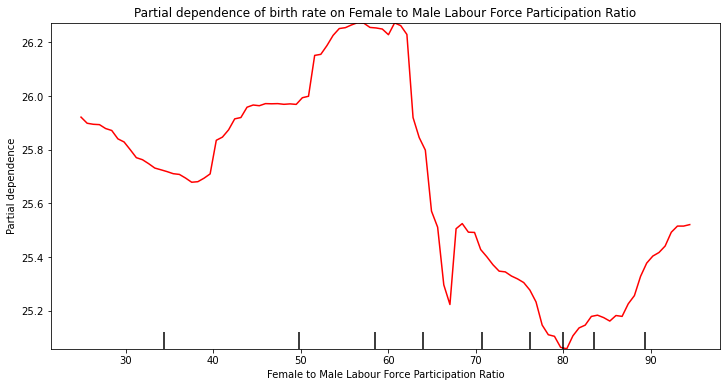

In [65]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

X = df1.drop(['Birth Rate', 'Country Name', 'Year'], axis=1) 
feature_names = list(X.columns) 
feature = 'Female to Male Labour Force Participation Ratio' 
feature_index = feature_names.index(feature)

fig, ax = plt.subplots(figsize=(12, 6))
plot_partial_dependence(model, X, features=[feature_index], ax=ax, line_kw={"color": "red"})
plt.title(f'Partial dependence of birth rate on {feature}')
plt.ylabel('Partial dependence')
plt.show()


In [67]:
df1.columns = df1.columns.str.replace(' ', '_')

import statsmodels.formula.api as smf

df1['Interaction'] = df1['Female_Labour_Force_Participation_Rate'] * df1['Female_Literacy'] * df1['Women_Business_and_Law_Index']

model = smf.ols(formula='Birth_Rate ~ Female_Labour_Force_Participation_Rate + \
                Female_Literacy + Women_Business_and_Law_Index + Interaction + \
                Male_Literacy + Male_Labour_Force_Participation_Rate + \
                Female_to_Male_Labour_Force_Participation_Ratio + Average_Income + \
                Internet_User_Percentage + Under_5_Mortality + Unemployment', 
                data=df1)

results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:             Birth_Rate   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1553.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:22:51   Log-Likelihood:                -12317.
No. Observations:                4074   AIC:                         2.466e+04
Df Residuals:                    4062   BIC:                         2.473e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [70]:
# List of all factors (excluding 'Country Name' and 'Year')
factors = ['Birth_Rate','Female_Literacy', 'Female_Labour_Force_Participation_Rate', 'Male_Literacy', 'Male_Labour_Force_Participation_Rate', 'Female_to_Male_Labour_Force_Participation_Ratio', 'Average_Income', 'Internet_User_Percentage', 'Under_5_Mortality','Women_Business_and_Law_Index','Unemployment','Interaction']

df_factors = df1[factors]

# Calculate the correlation matrix
correlation_matrix = df_factors.corr()

print(correlation_matrix)


                                                 Birth_Rate  Female_Literacy  \
Birth_Rate                                         1.000000        -0.810029   
Female_Literacy                                   -0.810029         1.000000   
Female_Labour_Force_Participation_Rate             0.164072        -0.002109   
Male_Literacy                                     -0.777686         0.955924   
Male_Labour_Force_Participation_Rate               0.166939        -0.121306   
Female_to_Male_Labour_Force_Participation_Ratio    0.082426         0.064285   
Average_Income                                    -0.505157         0.413574   
Internet_User_Percentage                          -0.576853         0.489744   
Under_5_Mortality                                  0.853919        -0.818247   
Women_Business_and_Law_Index                      -0.443150         0.439459   
Unemployment                                      -0.206753         0.188144   
Interaction                             

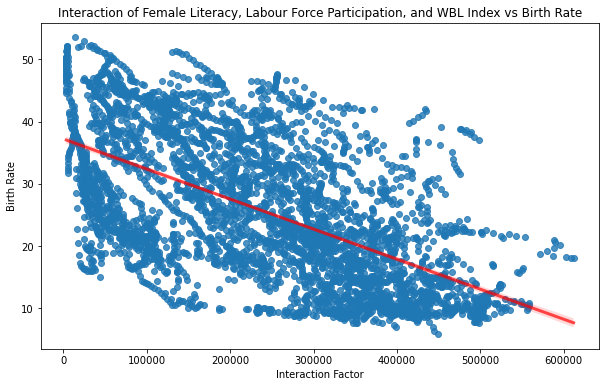

In [73]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='Interaction', y='Birth_Rate', data=df1, line_kws={"color":"r","alpha":0.7,"lw":3})

plt.title('Interaction of Female Literacy, Labour Force Participation, and WBL Index vs Birth Rate')
plt.xlabel('Interaction Factor')
plt.ylabel('Birth Rate')
plt.savefig('interaction_plot.png')

plt.show()


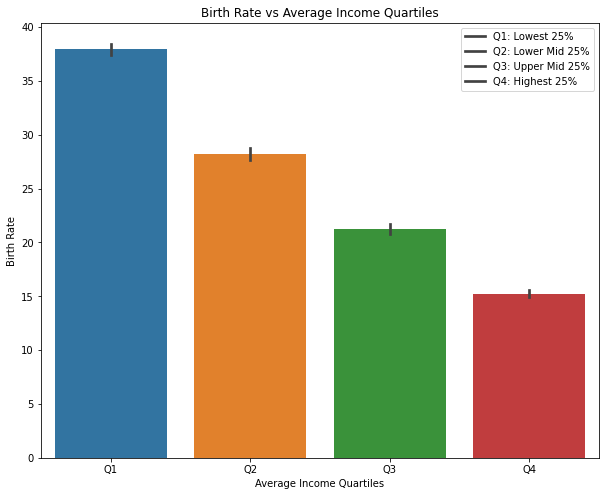

In [79]:
df1['Income_Quartile'] = pd.qcut(df1['Average_Income'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x='Income_Quartile', y='Birth_Rate', data=df1, ax=ax)

ax.set_title('Birth Rate vs Average Income Quartiles')
ax.set_xlabel('Average Income Quartiles')
ax.set_ylabel('Birth Rate')
ax.legend(['Q1: Lowest 25%', 'Q2: Lower Mid 25%', 'Q3: Upper Mid 25%', 'Q4: Highest 25%'])

plt.savefig("income_br_quartiles.png")
plt.show()


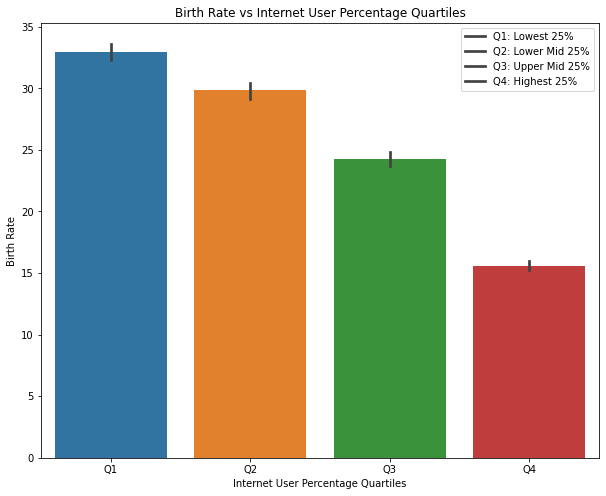

In [85]:
df1['Internet_Quartile'] = pd.qcut(df1['Internet_User_Percentage'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x='Internet_Quartile', y='Birth_Rate', data=df1, ax=ax)

ax.set_title('Birth Rate vs Internet User Percentage Quartiles')
ax.set_xlabel('Internet User Percentage Quartiles')
ax.set_ylabel('Birth Rate')
ax.legend(['Q1: Lowest 25%', 'Q2: Lower Mid 25%', 'Q3: Upper Mid 25%', 'Q4: Highest 25%'])

plt.savefig("internet_br_quartiles.png")
plt.show()


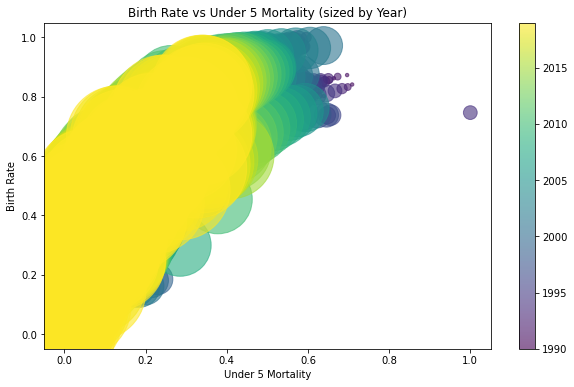

In [91]:
import matplotlib as mpl

plt.figure(figsize=(10,6))
df1['Year_scale'] = (df1['Year'] - df1['Year'].min()) / (df1['Year'].max() - df1['Year'].min())
scatter = plt.scatter(data=df1, x='Under_5_Mortality', y='Birth_Rate', 
                      c='Year', cmap='viridis', alpha=0.6, 
                      sizes=(df1['Year_scale'] * 100)**2)
plt.title('Birth Rate vs Under 5 Mortality (sized by Year)')
plt.xlabel('Under 5 Mortality')
plt.ylabel('Birth Rate')
plt.colorbar(scatter)
plt.show()


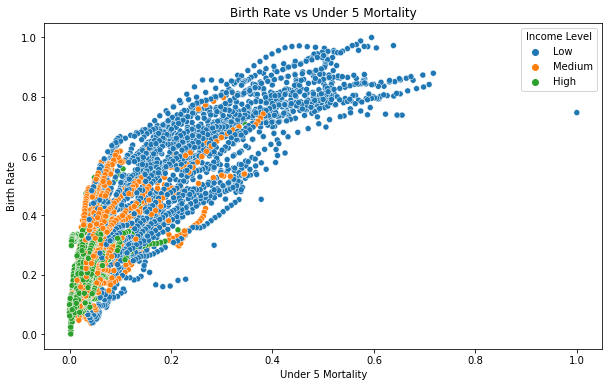

In [94]:
# Create income categories
bins = [0, 2000, 5300, np.inf]
names = ['Low', 'Medium', 'High']
df1['Income_Level'] = pd.cut(df1['Average_Income'], bins, labels=names)

# Create the scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='Under_5_Mortality', y='Birth_Rate', hue='Income_Level')
plt.title('Birth Rate vs Under 5 Mortality')
plt.xlabel('Under 5 Mortality')
plt.ylabel('Birth Rate')
plt.legend(title='Income Level')

# Save the figure
plt.savefig('averageincomescatterplot.png', dpi=300)

# Show the figure
plt.show()


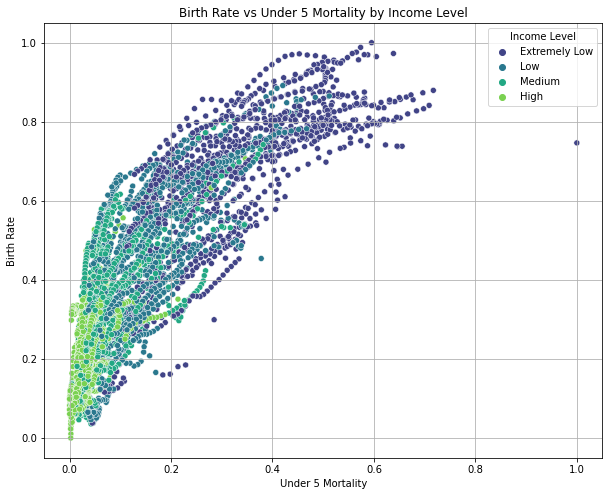

In [98]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create income categories
bins = [0, 668, 1957, 5264, np.inf]
names = ['Extremely Low', 'Low', 'Medium', 'High']
df1['Income_Level'] = pd.cut(df1['Average_Income'], bins, labels=names)

plt.figure(figsize=(10,8))
sns.scatterplot(data=df1, x='Under_5_Mortality', y='Birth_Rate', hue='Income_Level', palette='viridis')
plt.title('Birth Rate vs Under 5 Mortality by Income Level')
plt.xlabel('Under 5 Mortality')
plt.ylabel('Birth Rate')

# Include legend and grid
plt.legend(title='Income Level')
plt.grid(True)

# Save the plot as a png file
plt.savefig('Birthrate_Under5Mortality_IncomeLevel222.png')
plt.show()


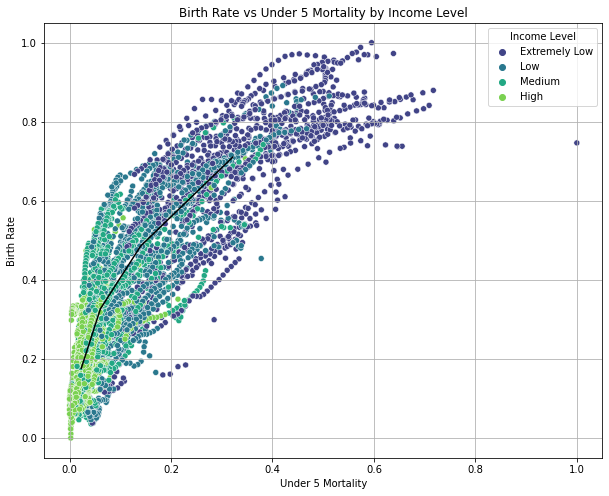

In [96]:
plt.figure(figsize=(10,8))

# Create a scatter plot
sns.scatterplot(data=df1, x='Under_5_Mortality', y='Birth_Rate', hue='Income_Level', palette='viridis')

# Create a grouped dataframe to find median values
grouped = df1.groupby('Income_Level').median().reset_index()

# Create lines between median points of each category
sns.lineplot(data=grouped, x='Under_5_Mortality', y='Birth_Rate', sort=False, color='black')

plt.title('Birth Rate vs Under 5 Mortality by Income Level')
plt.xlabel('Under 5 Mortality')
plt.ylabel('Birth Rate')

# Include legend and grid
plt.legend(title='Income Level')
plt.grid(True)

# Save the plot as a png file
plt.savefig('Birthrate_Under5Mortality_IncomeLevel.png')
plt.show()


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.preprocessing import MinMaxScaler

# Define the list of features
features = ['Birth_Rate', 'Under_5_Mortality', 'Interaction']

# Apply MinMaxScaler to the features
scaler = MinMaxScaler()
df1[features] = scaler.fit_transform(df1[features])

# Sort the data by year
df1 = df1.sort_values('Year')

# Define a function to plot for a selected country
def plot_for_country(country):
    plt.figure(figsize=(15,8))
    plt.title(f"Evolution of normalized features for {country}")
    country_data = df1[df1['Country_Name'] == country]
    for feature in features:
        sns.lineplot(data=country_data, x='Year', y=feature, label=feature)
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Dropdown for country selection
interact(plot_for_country, country=sorted(df1['Country_Name'].unique()))


interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

<function __main__.plot_for_country(country)>

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, SelectMultiple
from sklearn.preprocessing import MinMaxScaler

# Define the list of features
features = ['Birth_Rate', 'Under_5_Mortality', 'Interaction', 'Female_Literacy', 'Female_Labour_Force_Participation_Rate',
            'Male_Literacy', 'Male_Labour_Force_Participation_Rate', 'Female_to_Male_Labour_Force_Participation_Ratio',
            'Average_Income', 'Internet_User_Percentage', 'Women_Business_and_Law_Index', 'Unemployment']

# Apply MinMaxScaler to the features
scaler = MinMaxScaler()
df1[features] = scaler.fit_transform(df1[features])

# Sort the data by year
df1 = df1.sort_values('Year')

# Define a function to plot for a selected country
def plot_for_country(country, features):
    plt.figure(figsize=(15,8))
    plt.title(f"Evolution of normalized features for {country} (Hold Control/Command and click to select multiple features)")
    country_data = df1[df1['Country_Name'] == country]
    for feature in features:
        sns.lineplot(data=country_data, x='Year', y=feature, label=feature)
    plt.xlabel('Year')
    plt.ylabel('Normalized Values')
    plt.legend()
    plt.show()

# Dropdown for country selection and multiple select for features
interact(plot_for_country, country=sorted(df1['Country_Name'].unique()), features=SelectMultiple(options=features))


interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

<function __main__.plot_for_country(country, features)>